## Parial 2 Materiales magneticos

In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Cargar el dataset
df = pd.read_csv(r'C:\Users\Kevin\Documents\mineria\Mineria_de_Datos\5.Clasificacion\Data\materiales_magneticos.csv')


In [3]:
df

,nombre_material,masa_molar,electrones_desapareados,susceptibilidad,temperatura_curie,conductividad,clase_magnetica
0,Ferro_102,54.091501,5,545.724107,291.554888,9.762373e+05,ferromagnetico
1,Ferro_308,48.277437,4,272.927833,527.743584,9.825926e+05,ferromagnetico
2,Ferro_681,53.158955,3,1033.234678,642.997459,1.064175e+06,ferromagnetico
3,Ferro_600,52.703524,4,682.609278,640.315377,1.002900e+06,ferromagnetico
4,Ferro_1,46.847911,4,860.222659,642.065452,9.238700e+05,ferromagnetico
...,...,...,...,...,...,...,...
36995,Dia_177,42.936660,0,-0.082228,NaN,1.013775e+04,diamagnetico
36996,Dia_780,52.790276,0,-0.887969,NaN,1.145735e+04,diamagnetico
36997,Dia_755,55.472254,0,-0.097521,NaN,1.090343e+04,diamagnetico
36998,Dia_478,39.176005,0,-0.796568,NaN,1.050176e+04,diamagnetico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37000 entries, 0 to 36999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nombre_material          37000 non-null  object 
 1   masa_molar               37000 non-null  float64
 2   electrones_desapareados  37000 non-null  int64  
 3   susceptibilidad          37000 non-null  float64
 4   temperatura_curie        20000 non-null  float64
 5   conductividad            37000 non-null  float64
 6   clase_magnetica          37000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.0+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
nombre_material,37000,2868,Ferro_840,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
masa_molar,37000.0,NaN,NaN,NaN,56.767442,8.929872,19.464336,51.04183,56.282861,61.867201,106.098847
electrones_desapareados,37000.0,NaN,NaN,NaN,3.119649,1.802225,0.0,1.0,3.0,5.0,8.0
susceptibilidad,37000.0,NaN,NaN,NaN,299.808553,333.665447,-1.142053,4.824084,168.278647,586.022715,1089.202954
temperatura_curie,20000.0,NaN,NaN,NaN,646.859521,206.188605,192.580465,470.860391,645.803749,821.084559,1133.847455
conductividad,37000.0,NaN,NaN,NaN,744576.114034,313598.477295,6029.543154,497234.909152,829657.121736,1013019.420238,1437789.353821
clase_magnetica,37000,3,ferromagnetico,20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Ver valores nulos por columna
print(df.isnull().sum())


nombre_material                0
masa_molar                     0
electrones_desapareados        0
susceptibilidad                0
temperatura_curie          17000
conductividad                  0
clase_magnetica                0
dtype: int64


In [7]:
(17000*100)/37000 #verificar que porcentaje tiene de espacios vacios 

45.945945945945944

se elimina la masa molar y la temperatura de curie , la masa molar no aporta nada a la clasificacion magnetica del material y la temperatura de curie solo es relevante en materiales ferromageneticos; para entrenar el modelo quitar la columna para hacer el test  ,lo que reduce le modelo a 3 dimensiones, graficable en R3

### Revisar si efetivamente hay columnas con mas peso que otra

Electromagenticamnete las suceptibilidad y la conductividad de terminan la clasificacion de material magnetico , desconozco si la masa afecta directamente a la clasificacion 

In [8]:
# Seleccionar columnas relevantes (ajusta según tu DataFrame)
# Eliminar la columna 'masa_molar'
df = df.drop(columns=['masa_molar'])
df = df.drop(columns=['temperatura_curie'])
features = [ 'electrones_desapareados', 'susceptibilidad',  'conductividad']
X = df[features]
y = df['clase_magnetica']


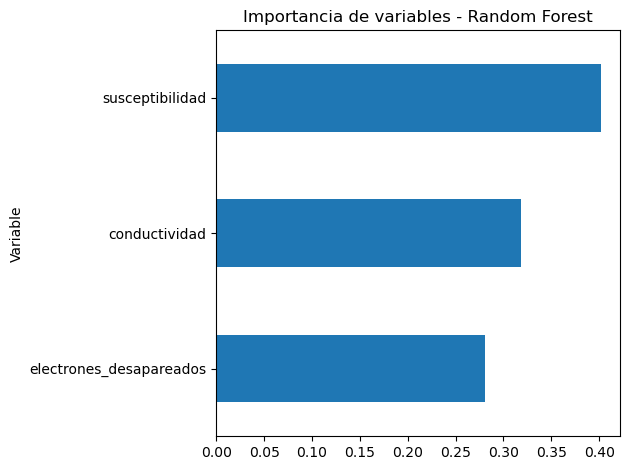

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia de variables
importances = rf.feature_importances_
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
importancia_df.sort_values(by='Importancia', ascending=True).plot(kind='barh', x='Variable', legend=False)
plt.title("Importancia de variables - Random Forest")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Crear codificador
le = LabelEncoder()

# Codificar y
y_encoded = le.fit_transform(y)

# Ahora divide el dataset (usa y_encoded en vez de y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [16]:
df

,nombre_material,electrones_desapareados,susceptibilidad,conductividad,clase_magnetica
0,Ferro_102,5,545.724107,9.762373e+05,ferromagnetico
1,Ferro_308,4,272.927833,9.825926e+05,ferromagnetico
2,Ferro_681,3,1033.234678,1.064175e+06,ferromagnetico
3,Ferro_600,4,682.609278,1.002900e+06,ferromagnetico
4,Ferro_1,4,860.222659,9.238700e+05,ferromagnetico
...,...,...,...,...,...
36995,Dia_177,0,-0.082228,1.013775e+04,diamagnetico
36996,Dia_780,0,-0.887969,1.145735e+04,diamagnetico
36997,Dia_755,0,-0.097521,1.090343e+04,diamagnetico
36998,Dia_478,0,-0.796568,1.050176e+04,diamagnetico


### Entrenamiento supervisado 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


=== Modelo: Random Forest ===
                precision    recall  f1-score   support

  diamagnetico       1.00      1.00      1.00       589
ferromagnetico       1.00      1.00      1.00      5998
 paramagnetico       1.00      1.00      1.00      4513

      accuracy                           1.00     11100
     macro avg       1.00      1.00      1.00     11100
  weighted avg       1.00      1.00      1.00     11100



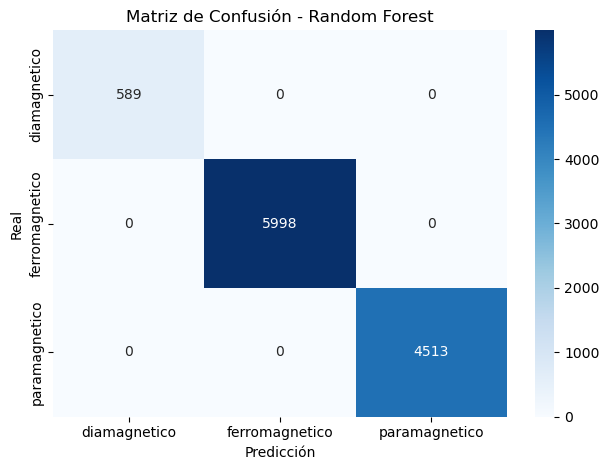


=== Modelo: XGBoost ===


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:31:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                precision    recall  f1-score   support

  diamagnetico       1.00      1.00      1.00       589
ferromagnetico       1.00      1.00      1.00      5998
 paramagnetico       1.00      1.00      1.00      4513

      accuracy                           1.00     11100
     macro avg       1.00      1.00      1.00     11100
  weighted avg       1.00      1.00      1.00     11100



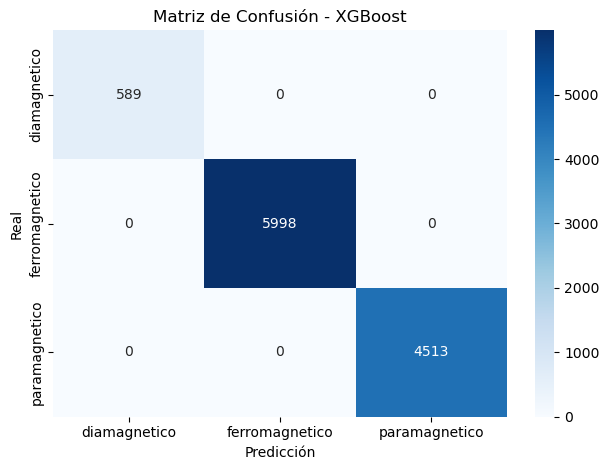


=== Modelo: k-NN ===
                precision    recall  f1-score   support

  diamagnetico       1.00      1.00      1.00       589
ferromagnetico       1.00      1.00      1.00      5998
 paramagnetico       1.00      1.00      1.00      4513

      accuracy                           1.00     11100
     macro avg       1.00      1.00      1.00     11100
  weighted avg       1.00      1.00      1.00     11100



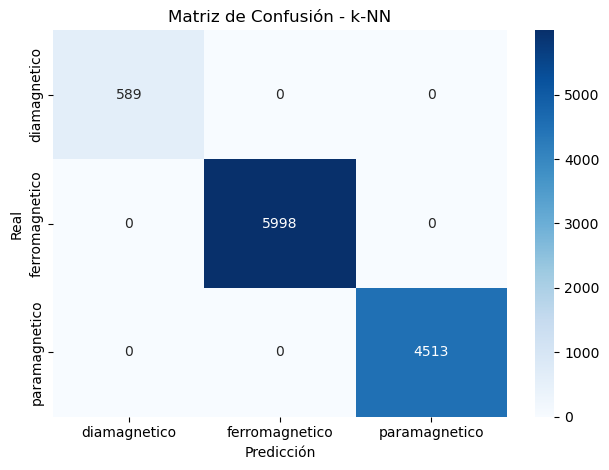


=== Modelo: SVM ===
                precision    recall  f1-score   support

  diamagnetico       1.00      1.00      1.00       589
ferromagnetico       1.00      1.00      1.00      5998
 paramagnetico       1.00      1.00      1.00      4513

      accuracy                           1.00     11100
     macro avg       1.00      1.00      1.00     11100
  weighted avg       1.00      1.00      1.00     11100



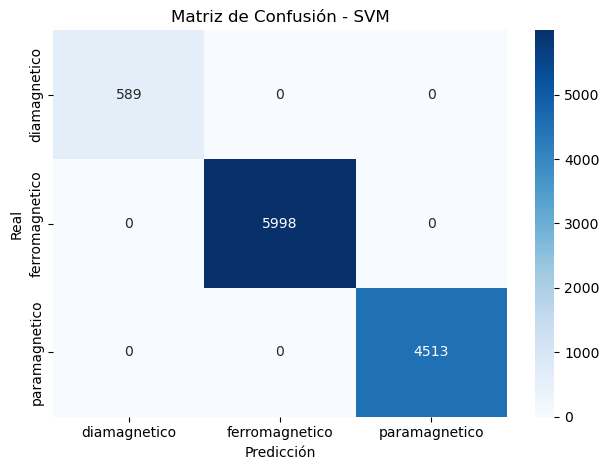


=== Modelo: Regresión Logística ===
                precision    recall  f1-score   support

  diamagnetico       1.00      1.00      1.00       589
ferromagnetico       1.00      1.00      1.00      5998
 paramagnetico       1.00      1.00      1.00      4513

      accuracy                           1.00     11100
     macro avg       1.00      1.00      1.00     11100
  weighted avg       1.00      1.00      1.00     11100



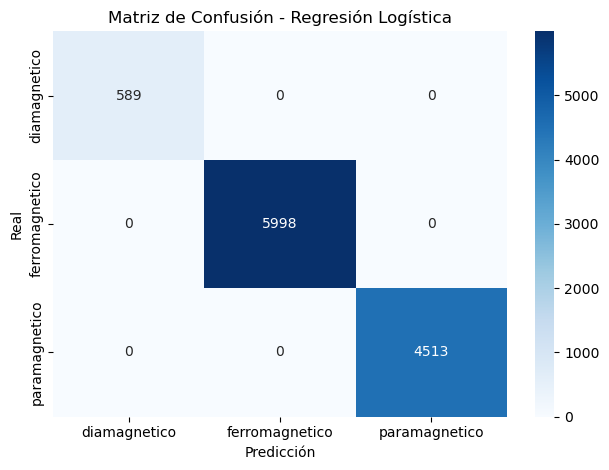


=== Modelo: Árbol de Decisión ===
                precision    recall  f1-score   support

  diamagnetico       1.00      1.00      1.00       589
ferromagnetico       1.00      1.00      1.00      5998
 paramagnetico       1.00      1.00      1.00      4513

      accuracy                           1.00     11100
     macro avg       1.00      1.00      1.00     11100
  weighted avg       1.00      1.00      1.00     11100



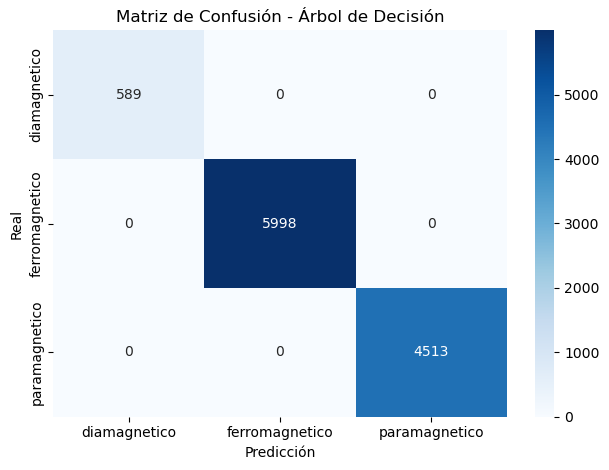


=== Modelo: Naive Bayes ===
                precision    recall  f1-score   support

  diamagnetico       1.00      1.00      1.00       589
ferromagnetico       1.00      1.00      1.00      5998
 paramagnetico       1.00      1.00      1.00      4513

      accuracy                           1.00     11100
     macro avg       1.00      1.00      1.00     11100
  weighted avg       1.00      1.00      1.00     11100



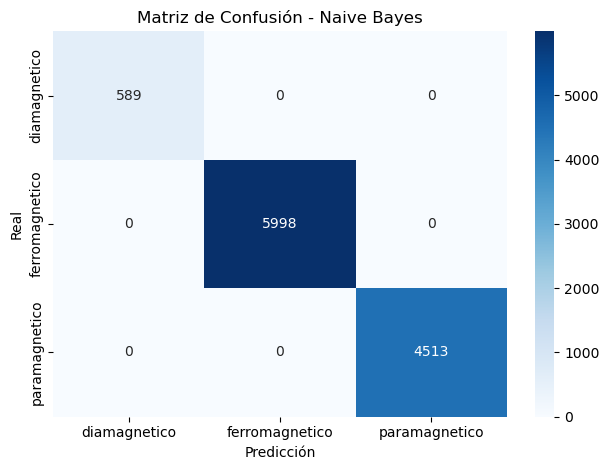


=== Comparación de modelos ===


,Modelo,Accuracy,Precision,Recall,F1-score
0,Random Forest,1.0,1.0,1.0,1.0
1,XGBoost,1.0,1.0,1.0,1.0
2,k-NN,1.0,1.0,1.0,1.0
3,SVM,1.0,1.0,1.0,1.0
4,Regresión Logística,1.0,1.0,1.0,1.0
5,Árbol de Decisión,1.0,1.0,1.0,1.0
6,Naive Bayes,1.0,1.0,1.0,1.0


In [18]:
# === DATOS ===
features = ['electrones_desapareados', 'susceptibilidad',  'conductividad']
X = df[features]
y = df['clase_magnetica']

X = X.dropna()
y = y.loc[X.index]

# === CODIFICAR CLASES ===
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# === ESCALAR: NORMALIZACIÓN TIPO Z-SCORE ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === DIVISIÓN ENTRENAMIENTO/PRUEBA (70/30) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)

# === DEFINIR MODELOS ===
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'k-NN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# === ENTRENAR Y EVALUAR ===
resultados = []

for nombre, modelo in modelos.items():
    print(f"\n=== Modelo: {nombre} ===")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    resultados.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })
    
    # MATRIZ DE CONFUSIÓN
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# === COMPARACIÓN FINAL DE MODELOS ===
df_resultados = pd.DataFrame(resultados)
print("\n=== Comparación de modelos ===")
display(df_resultados.sort_values(by='F1-score', ascending=False))

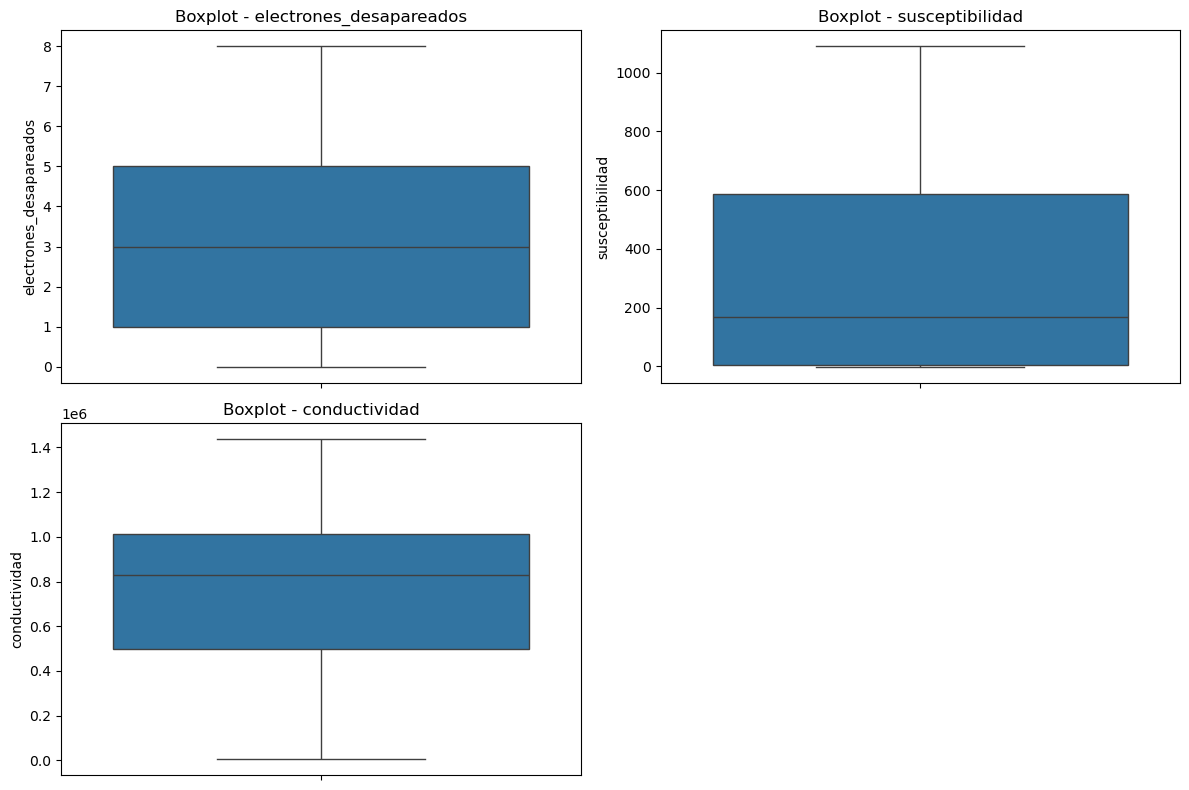

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar boxplots para cada feature
features = ['electrones_desapareados', 'susceptibilidad',  'conductividad']

plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()


## validacion cruzada 
### comprobar que no haya overfiting|

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

modelos = {
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for nombre, modelo in modelos.items():
    pipeline = make_pipeline(StandardScaler(), modelo)
    
    start = time.time()
    resultados = cross_validate(
        pipeline, X, y_encoded, cv=5, 
        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
        return_train_score=False
    )
    end = time.time()
    
    print(f"\n=== Modelo: {nombre} ===")
    print(f"Accuracy promedio       : {resultados['test_accuracy'].mean():.5f} ± {resultados['test_accuracy'].std():.5f}")
    print(f"Precisión promedio      : {resultados['test_precision_weighted'].mean():.5f}")
    print(f"Recall promedio         : {resultados['test_recall_weighted'].mean():.5f}")
    print(f"F1-score promedio       : {resultados['test_f1_weighted'].mean():.5f}")
    print(f"Tiempo total (s)        : {end - start:.4f}")



=== Modelo: k-NN ===
Accuracy promedio       : 1.00000 ± 0.00000
Precisión promedio      : 1.00000
Recall promedio         : 1.00000
F1-score promedio       : 1.00000
Tiempo total (s)        : 1.6804

=== Modelo: Naive Bayes ===
Accuracy promedio       : 1.00000 ± 0.00000
Precisión promedio      : 1.00000
Recall promedio         : 1.00000
F1-score promedio       : 1.00000
Tiempo total (s)        : 0.0680


In [26]:
from sklearn.svm import SVC

pipeline_svm = make_pipeline(StandardScaler(), SVC())

start = time.time()
resultados_svm = cross_validate(
    pipeline_svm, X, y_encoded, cv=5, 
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    return_train_score=False
)
end = time.time()

print("\n=== Modelo: SVM ===")
print(f"Accuracy promedio       : {resultados_svm['test_accuracy'].mean():.5f} ± {resultados_svm['test_accuracy'].std():.5f}")
print(f"Precisión promedio      : {resultados_svm['test_precision_weighted'].mean():.5f}")
print(f"Recall promedio         : {resultados_svm['test_recall_weighted'].mean():.5f}")
print(f"F1-score promedio       : {resultados_svm['test_f1_weighted'].mean():.5f}")
print(f"Tiempo total (s)        : {end - start:.4f}")



=== Modelo: SVM ===
Accuracy promedio       : 1.00000 ± 0.00000
Precisión promedio      : 1.00000
Recall promedio         : 1.00000
F1-score promedio       : 1.00000
Tiempo total (s)        : 0.6442


### Busqueda de hiperparametros por probar ,ya hay metricas perfectas 

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

param_dist_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 31),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

pipeline_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

random_search_knn = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_knn.fit(X, y_encoded)

print("\n=== Randomized Search k-NN ===")
print("Mejores parámetros:", random_search_knn.best_params_)
print(f"Mejor accuracy promedio: {random_search_knn.best_score_:.5f}")



=== Randomized Search k-NN ===
Mejores parámetros: {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 12}
Mejor accuracy promedio: 1.00000


In [28]:
from sklearn.naive_bayes import GaussianNB

# Único hiperparámetro relevante en GaussianNB
param_dist_nb = {
    'gaussiannb__var_smoothing': np.logspace(-12, -6, 100)
}

pipeline_nb = make_pipeline(StandardScaler(), GaussianNB())

random_search_nb = RandomizedSearchCV(
    pipeline_nb,
    param_distributions=param_dist_nb,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_nb.fit(X, y_encoded)

print("\n=== Randomized Search Naive Bayes ===")
print("Mejores parámetros:", random_search_nb.best_params_)
print(f"Mejor accuracy promedio: {random_search_nb.best_score_:.5f}")



=== Randomized Search Naive Bayes ===
Mejores parámetros: {'gaussiannb__var_smoothing': 1.0722672220103232e-07}
Mejor accuracy promedio: 1.00000


In [29]:
from sklearn.svm import SVC

param_dist_svm = {
    'svc__C': np.logspace(-3, 3, 10),
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

pipeline_svm = make_pipeline(StandardScaler(), SVC())

random_search_svm = RandomizedSearchCV(
    pipeline_svm,
    param_distributions=param_dist_svm,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_svm.fit(X, y_encoded)

print("\n=== Randomized Search SVM ===")
print("Mejores parámetros:", random_search_svm.best_params_)
print(f"Mejor accuracy promedio: {random_search_svm.best_score_:.5f}")



=== Randomized Search SVM ===
Mejores parámetros: {'svc__kernel': 'poly', 'svc__gamma': 'auto', 'svc__C': 0.1}
Mejor accuracy promedio: 1.00000


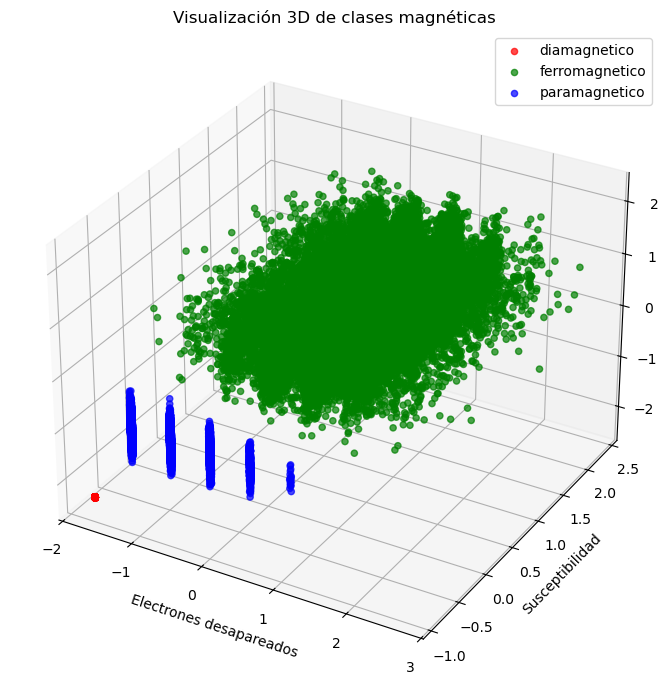

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convertir a DataFrame por claridad si está escalado
X_df = pd.DataFrame(X_scaled, columns=['electrones_desapareados', 'susceptibilidad', 'conductividad'])

# Crear figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Colores por clase
colores = ['red', 'green', 'blue']
etiquetas = le.inverse_transform(np.unique(y_encoded))

for clase, color, etiqueta in zip(np.unique(y_encoded), colores, etiquetas):
    puntos = X_df[y_encoded == clase]
    ax.scatter(
        puntos['electrones_desapareados'],
        puntos['susceptibilidad'],
        puntos['conductividad'],
        c=color, label=etiqueta, alpha=0.7
    )

ax.set_xlabel('Electrones desapareados')
ax.set_ylabel('Susceptibilidad')
ax.set_zlabel('Conductividad')
ax.set_title('Visualización 3D de clases magnéticas')
ax.legend()
plt.tight_layout()
plt.show()


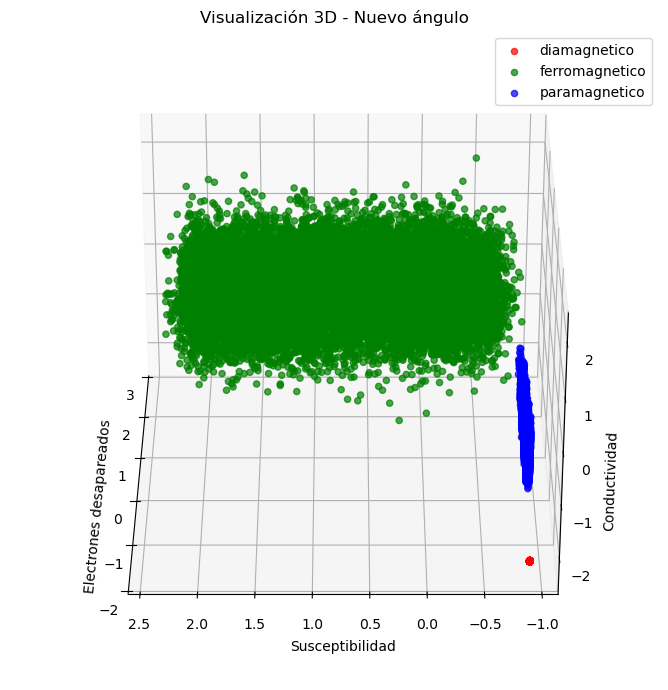

In [22]:
# Crear figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Ángulos de la cámara: elevación y azimut
ax.view_init(elev=30, azim=180)  # ← puedes ajustar los valores

# Colores por clase
colores = ['red', 'green', 'blue']
etiquetas = le.inverse_transform(np.unique(y_encoded))

for clase, color, etiqueta in zip(np.unique(y_encoded), colores, etiquetas):
    puntos = X_df[y_encoded == clase]
    ax.scatter(
        puntos['electrones_desapareados'],
        puntos['susceptibilidad'],
        puntos['conductividad'],
        c=color, label=etiqueta, alpha=0.7
    )

ax.set_xlabel('Electrones desapareados')
ax.set_ylabel('Susceptibilidad')
ax.set_zlabel('Conductividad')
ax.set_title('Visualización 3D - Nuevo ángulo')
ax.legend()
plt.tight_layout()
plt.show()


## Modelo de no supervisado 

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Características sin la clase objetivo
features = ['electrones_desapareados', 'susceptibilidad', 'conductividad']
X_unsupervised = df[features].dropna()

# Escalado
scaler = StandardScaler()
X_scaled_unsupervised = scaler.fit_transform(X_unsupervised)


In [37]:
# Supongamos que estas son tus variables de entrada
features = ['susceptibilidad', 'conductividad', 'electrones_desapareados']

# Creamos el DataFrame base para análisis
df_cluster = df[features].copy()
df_cluster['cluster_kmeans'] = labels_kmeans
df_cluster['cluster_dbscan'] = labels_dbscan



=== Validación Interna - DBSCAN ===
Silhouette Score: 0.2467054567696353
Davies-Bouldin Index: 4.677136361021448
Calinski-Harabasz Score: 10145.558450790993


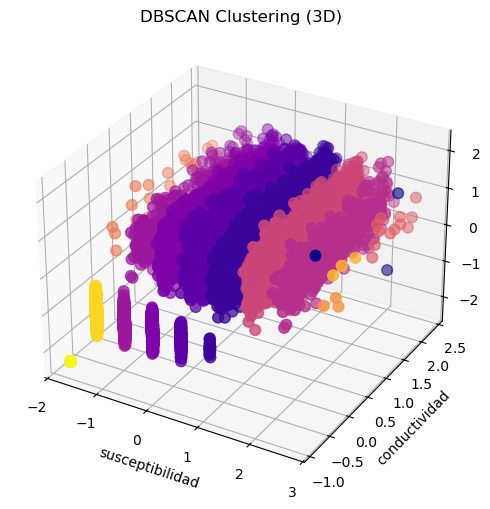

In [39]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Contar clústeres
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print("\n=== Validación Interna - DBSCAN ===")
if n_clusters_dbscan > 1:
    print("Silhouette Score:", silhouette_score(X_scaled, labels_dbscan))
    print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels_dbscan))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels_dbscan))
else:
    print("DBSCAN no encontró clústeres suficientes para validar internamente.")

# Gráfica en R3
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
           c=labels_dbscan, cmap='plasma', s=60)
ax.set_title("DBSCAN Clustering (3D)")
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.show()


In [40]:
df_cluster.groupby('cluster_dbscan').mean(numeric_only=True)



,susceptibilidad,conductividad,electrones_desapareados,cluster_kmeans
cluster_dbscan,,,,
-1,389.236406,9.502278e+05,6.727273,0.181818
0,549.187297,9.993812e+05,5.000000,0.002596
1,523.605799,9.782691e+05,4.000000,0.046502
2,308.042360,7.831604e+05,3.000000,0.444374
3,51.134137,5.408171e+05,2.000000,0.927127
4,543.001127,1.006522e+06,7.000000,0.000000
5,557.572244,9.990237e+05,6.000000,0.000000
6,613.467348,1.047939e+06,1.000000,0.185185
7,804.544127,1.000308e+06,8.000000,0.000000


mas uso de ram que de cpu 

Índice de silueta para KMeans con 3 clústeres: 0.5168


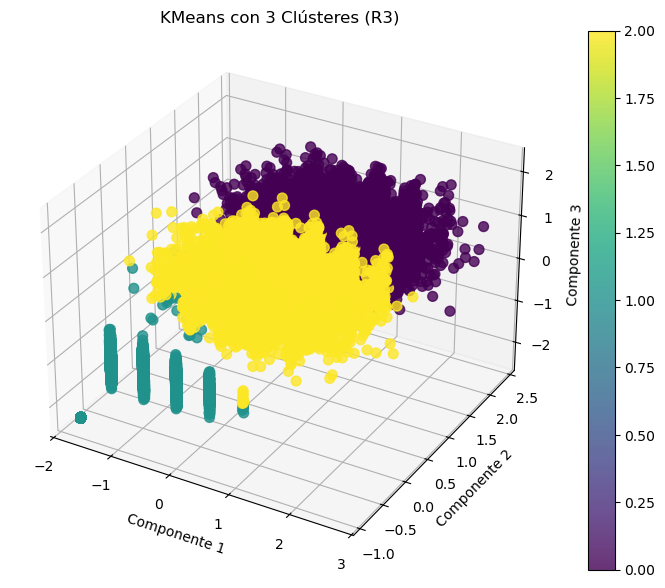

In [41]:
df_cluster.groupby('cluster_kmeans_3').mean(numeric_only=True)


In [51]:
df_cluster.groupby('cluster_kmeans_3').mean(numeric_only=True)


,susceptibilidad,conductividad,electrones_desapareados,cluster_kmeans,cluster_dbscan
cluster_kmeans_3,,,,,
0,777.847918,1.001564e+06,4.509869,0.000000,-0.000100
1,4.800077,4.426988e+05,1.485575,0.999882,0.117516
2,324.752388,1.001841e+06,4.513100,0.005300,0.000000


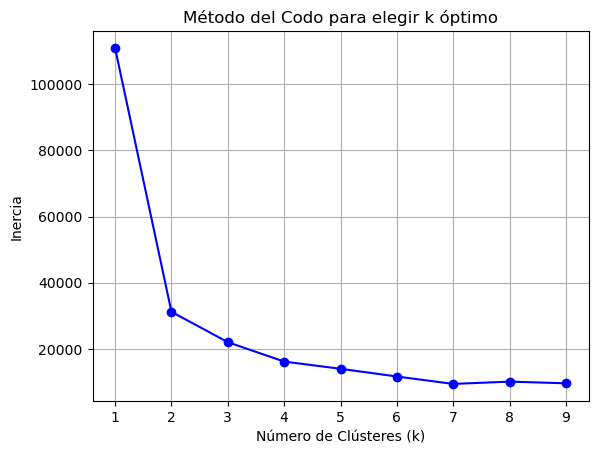

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir k óptimo')
plt.grid(True)
plt.show()


In [52]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X_scaled, df_cluster['cluster_kmeans_3'])
print(f"Silueta KMeans (3 clústeres): {silhouette_kmeans:.4f}")

silhouette_dbscan = silhouette_score(X_scaled, df_cluster['cluster_dbscan'])
print(f"Silueta DBSCAN: {silhouette_dbscan:.4f}")


Silueta KMeans (3 clústeres): 0.5168
Silueta DBSCAN: 0.1185


In [53]:
from sklearn.metrics import davies_bouldin_score

db_kmeans = davies_bouldin_score(X_scaled, df_cluster['cluster_kmeans_3'])
print(f"Davies-Bouldin KMeans: {db_kmeans:.4f}")


Davies-Bouldin KMeans: 0.8929


Correlacion etnre variables 

Coeficiente de correlación de Pearson (r)

    Qué mide:
    Relación lineal entre dos variables numéricas continuas.
    Evalúa cuánto se ajustan a una línea recta.
Coeficiente de correlación de Spearman (ρ o rho)

    Qué mide:
    Correlación monótona (creciente o decreciente), no necesariamente lineal.
    Se basa en los rangos de los datos.

Coeficiente de correlación de Kendall (τ o tau)

    Qué mide:
    Correlación basada en pares concordantes y discordantes, útil en distribuciones pequeñas o con muchos empates.

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['clase_magnetica_encoded'] = le.fit_transform(df['clase_magnetica'])


In [57]:
corr_spearman = df[features + ['clase_magnetica_encoded']].corr(method='spearman')
print("Correlación Spearman con la clase magnética:")
print(corr_spearman['clase_magnetica_encoded'].sort_values(ascending=False))



Correlación Spearman con la clase magnética:
clase_magnetica_encoded    1.000000
electrones_desapareados   -0.503937
conductividad             -0.531972
susceptibilidad           -0.532394
Name: clase_magnetica_encoded, dtype: float64


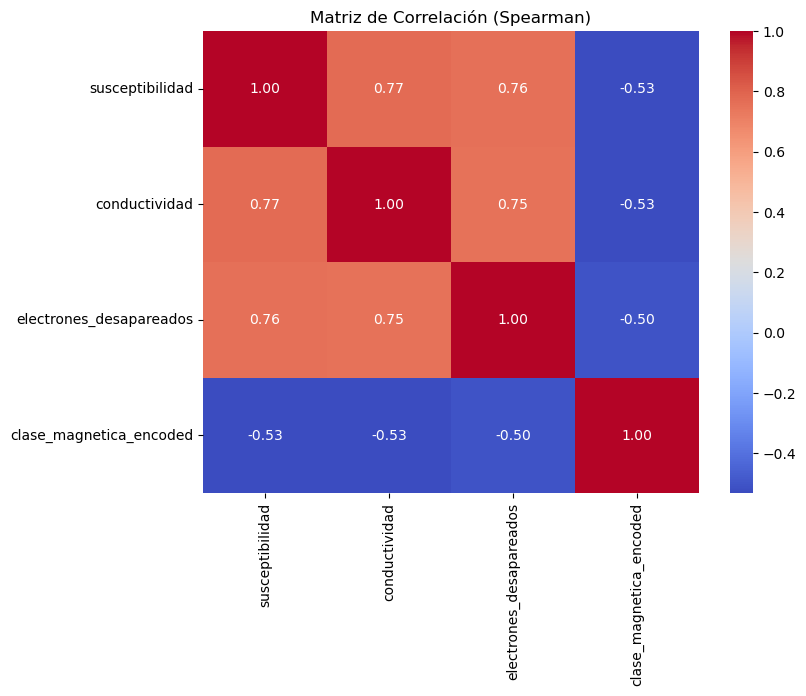

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Spearman)')
plt.show()


In [58]:
corr_pearson = df[features + ['clase_magnetica_encoded']].corr(method='pearson')
print("Correlación Pearson con la clase magnética:")
print(corr_pearson['clase_magnetica_encoded'].sort_values(ascending=False))


Correlación Pearson con la clase magnética:
clase_magnetica_encoded    1.000000
conductividad             -0.327461
electrones_desapareados   -0.395324
susceptibilidad           -0.533963
Name: clase_magnetica_encoded, dtype: float64


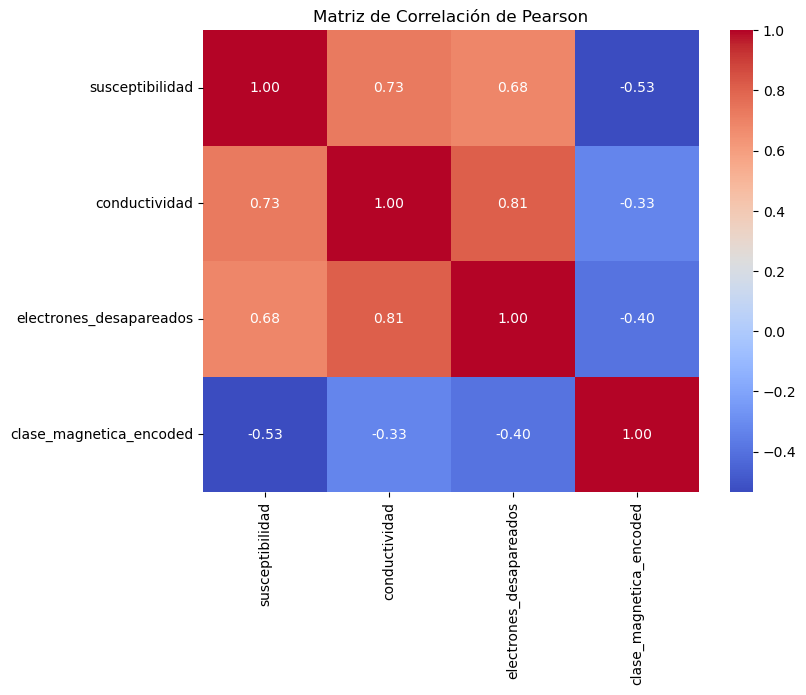

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()


In [59]:
corr_kendall = df[features + ['clase_magnetica_encoded']].corr(method='kendall')
print("Correlación Kendall con la clase magnética:")
print(corr_kendall['clase_magnetica_encoded'].sort_values(ascending=False))


Correlación Kendall con la clase magnética:
clase_magnetica_encoded    1.000000
conductividad             -0.456953
susceptibilidad           -0.457202
electrones_desapareados   -0.466326
Name: clase_magnetica_encoded, dtype: float64


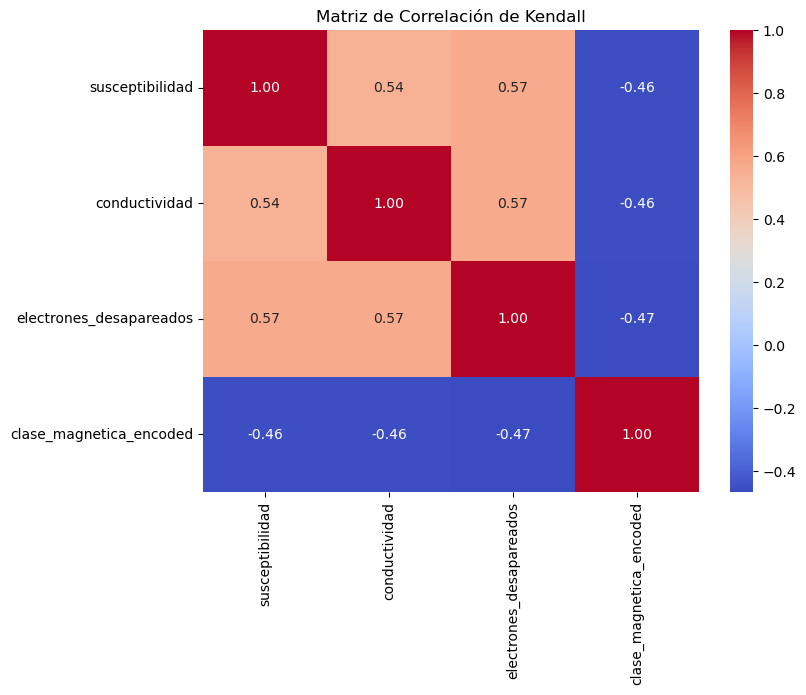

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_kendall,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Kendall')
plt.show()


1. Relación entre propiedades físicas y comportamiento magnético

    Se evidenció que materiales con más electrones desapareados y alta susceptibilidad presentan mayor probabilidad de ser ferromagnéticos, como lo demuestran tanto los modelos supervisados como los clústeres encontrados en aprendizaje no supervisado.

    Por el contrario, los materiales diamagneticos se agrupan claramente por su baja o nula susceptibilidad y mínima cantidad de electrones desapareados (clúster aislado en KMeans con valores bajos en todas las variables).